In [1]:
# Install the required version of scikit-learn
!pip install scikit-learn==1.0.2
!pip install eli5

# Import necessary libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import eli5
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from IPython.display import display_html
from sklearn.metrics import confusion_matrix
from joblib import Parallel, delayed

# Define constants
PATH_TO_DATA = r'/kaggle/input/open-ml-course-linear-models-spring22/'
SEED = 241

     ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.6/26.5 MB 16.3 MB/s eta 0:00:02

     ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/26.5 MB 22.7 MB/s eta 0:00:02

     ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/26.5 MB 35.7 MB/s eta 0:00:01

     ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/26.5 MB 45.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━ 17.2/26.5 MB 129.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━ 20.0/26.5 MB 145.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━ 20.1/26.5 MB 89.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━ 20.3/26.5 MB 57.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━ 20.6/26.5 MB 46.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 44.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 44.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 44.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 24.5 MB/s eta 0:00:00


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0


    Uninstalling scikit-learn-1.7.0:


      Successfully uninstalled scikit-learn-1.7.0



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/108.4 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 4.4 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.3 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/9.7 MB ? eta -:--:--

     ━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.9/9.7 MB 26.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/9.7 MB 37.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━ 5.6/9.7 MB 40.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━ 9.1/9.7 MB 52.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 40.0 MB/s eta 0:00:00


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2


    Uninstalling scikit-learn-1.0.2:


      Successfully uninstalled scikit-learn-1.0.2



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


E0000 00:00:1754482481.090278      74 common_lib.cc:612] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:230


In [2]:
def prepare_sparse_features(path_to_train, path_to_test, path_to_site_dict, vectorizer_params):
    """
    Prepare sparse features from the training and test datasets.

    Args:
        path_to_train (str): Path to the training dataset.
        path_to_test (str): Path to the test dataset.
        path_to_site_dict (str): Path to the site dictionary.
        vectorizer_params (dict): Parameters for the TfidfVectorizer.

    Returns:
        tuple: Sparse matrices for training and test data, target values, vectorizer, and time data.
    """
    times = ['time%s' % i for i in range(1, 11)]
    train_df = pd.read_csv(path_to_train, index_col='session_id', parse_dates=times)
    test_df = pd.read_csv(path_to_test, index_col='session_id', parse_dates=times)

    # Sort the data by time
    train_df = train_df.sort_values(by='time1')

    # Read site -> id mapping provided by competition organizers
    with open(path_to_site_dict, 'rb') as f:
        site2id = pickle.load(f)
    # Create an inverse id -> site mapping
    id2site = {v: k for (k, v) in site2id.items()}
    # We treat site with id 0 as "unknown"
    id2site[0] = 'unknown'

    # Transform data into format which can be fed into TfidfVectorizer
    sites = ['site%s' % i for i in range(1, 11)]
    train_sessions = train_df[sites].fillna(0).astype('int').apply(lambda row: ' '.join([id2site[i] for i in row]), axis=1).tolist()
    test_sessions = test_df[sites].fillna(0).astype('int').apply(lambda row: ' '.join([id2site[i] for i in row]), axis=1).tolist()

    # We'll tell TfidfVectorizer that we'd like to split data by whitespaces only
    # so that it doesn't split by dots
    vectorizer = TfidfVectorizer(**vectorizer_params)
    X_train = vectorizer.fit_transform(train_sessions)
    X_test = vectorizer.transform(test_sessions)
    y_train = train_df['target'].astype('int').values

    # We'll need site visit times for further feature engineering
    train_times, test_times = train_df[times], test_df[times]

    return X_train, X_test, y_train, vectorizer, train_times, test_times

# Prepare sparse features
X_train_sites, X_test_sites, y_train, vectorizer, train_times, test_times = prepare_sparse_features(
    path_to_train=os.path.join(PATH_TO_DATA, 'train.csv'),
    path_to_test=os.path.join(PATH_TO_DATA, 'test.csv'),
    path_to_site_dict=os.path.join(PATH_TO_DATA, 'site_dic.pkl'),
    vectorizer_params={'ngram_range': (1, 3), 'max_features': 31000, 'tokenizer': lambda s: s.split()}
)

/usr/local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [3]:
# Load site dictionary
sites_dict = pd.read_pickle(os.path.join(PATH_TO_DATA, 'site_dic.pkl'))
sites_dict_inv = {v: k for k, v in sites_dict.items()}

# Define columns for sites
sites_train = ['site%s' % i for i in range(1, 11)] + ['target']
sites_test = ['site%s' % i for i in range(1, 11)]

# Load and preprocess training and test data
train_sites = pd.read_csv(os.path.join(PATH_TO_DATA, 'train.csv'),
                         index_col='session_id', parse_dates=['time%s' % i for i in range(1, 11)])
test_sites = pd.read_csv(os.path.join(PATH_TO_DATA, 'test.csv'),
                        index_col='session_id', parse_dates=['time%s' % i for i in range(1, 11)])

train_sites = train_sites.sort_values(by='time1')
train_sites = train_sites[sites_train].fillna(0).astype('int')
test_sites = test_sites[sites_test].fillna(0).astype('int')

# Initialize lists for feature names and correlation dataframes
features_name = []
corr_df = []
time_split = TimeSeriesSplit(n_splits=10)

In [4]:
def write_to_submission_file(predicted_labels, out_file, target='target', index_label="session_id"):
    """
    Write predicted labels to a submission file.

    Args:
        predicted_labels (array-like): Predicted labels.
        out_file (str): Path to the output file.
        target (str): Name of the target column.
        index_label (str): Name of the index column.
    """
    predicted_df = pd.DataFrame(predicted_labels,
                                index=np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

def train_and_predict(model, X_train, y_train, X_test, site_feature_names=vectorizer.get_feature_names_out(),
                     new_feature_names=None, cv=time_split, scoring='roc_auc',
                     top_n_features_to_show=30, submission_file_name='submission.csv'):
    """
    Train and predict using a given model.

    Args:
        model: The model to train and predict with.
        X_train: Training features.
        y_train: Training target values.
        X_test: Test features.
        site_feature_names: Feature names from the vectorizer.
        new_feature_names: Additional feature names.
        cv: Cross-validation strategy.
        scoring: Scoring metric.
        top_n_features_to_show: Number of top features to show.
        submission_file_name: Name of the submission file.

    Returns:
        tuple: Predicted probabilities, true labels, predicted labels, confusion matrix, and CV scores.
    """
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    print('CV scores', cv_scores)
    print('CV mean: {}, CV std: {}'.format(cv_scores.mean(), cv_scores.std()))
    model.fit(X_train, y_train)

    if new_feature_names:
        all_feature_names = list(site_feature_names) + list(new_feature_names)
    else:
        all_feature_names = list(site_feature_names)

    display_html(eli5.show_weights(estimator=model, feature_names=all_feature_names, top=top_n_features_to_show))

    if new_feature_names:
        print('New feature weights:')
        print(pd.DataFrame({'feature': new_feature_names, 'coef': model.coef_.flatten()[-len(new_feature_names):]}))

    proba = model.predict_proba(X_train)
    predicted = model.predict(X_train)
    table_confusion = confusion_matrix(y_train, predicted)
    test_pred = model.predict_proba(X_test)[:, 1]
    write_to_submission_file(test_pred, submission_file_name)

    return proba, y_train, predicted, table_confusion, cv_scores

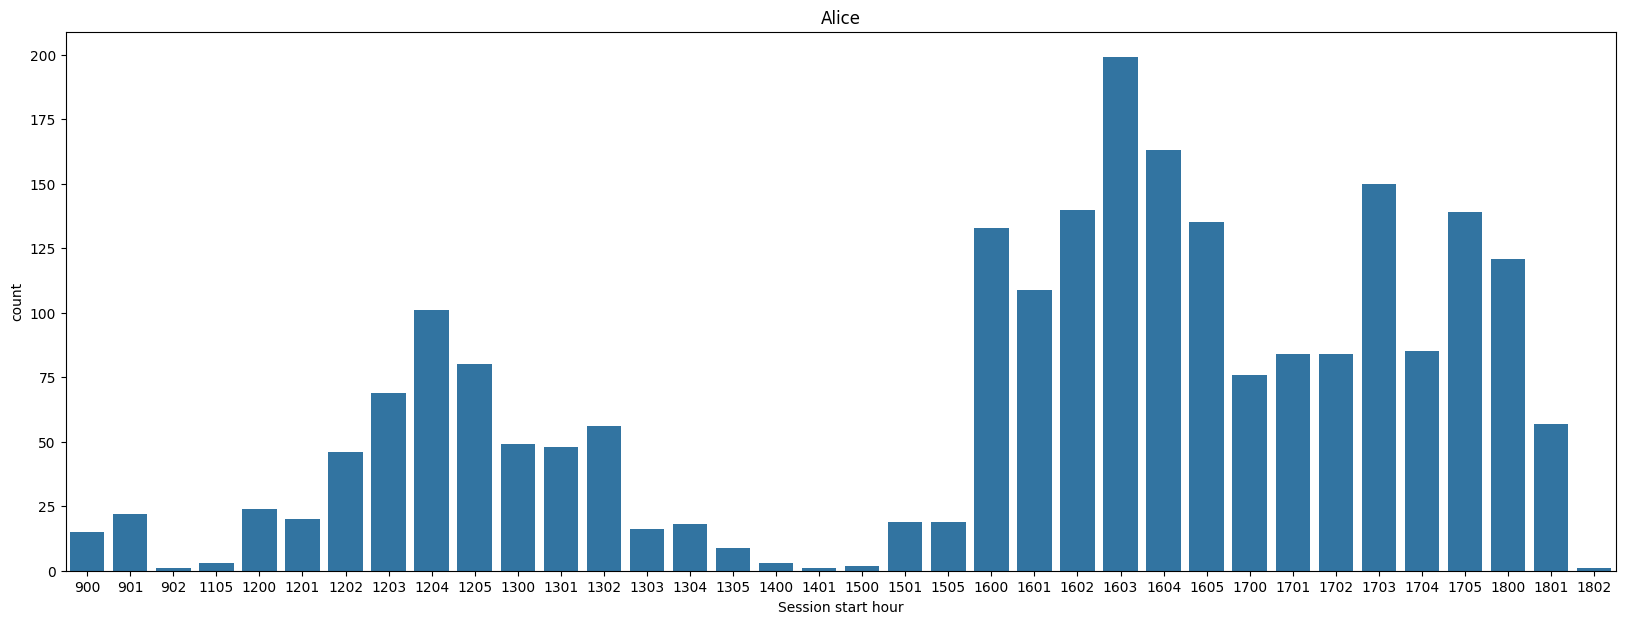

In [5]:
# Plot session start hour for Alice
session_start_hour = train_times['time1'].apply(lambda ts: 100 * ts.hour + int(ts.minute / 10)).values
plt.subplots(1, figsize=(20, 7))
sns.countplot(pd.DataFrame(session_start_hour[y_train == 1], columns=['time1']), x='time1')
plt.title("Alice")
plt.xlabel('Session start hour')

def add_time_features(times, X_sparse, add_feat=True):
    """
    Add time-based features to the sparse matrix.

    Args:
        times: DataFrame containing time columns.
        X_sparse: Sparse matrix of features.
        add_feat: Whether to add features to the correlation DataFrame.

    Returns:
        tuple: Updated sparse matrix and feature names.
    """
    hour = times['time1'].apply(lambda t: 100 * t.hour + t.minute) / 1000
    morning_1 = (((hour >= 0.901) & (hour <= 0.904) | (hour >= 0.922) & (hour <= 1.209)).astype('int') * hour).values.reshape(-1, 1)
    morning_2 = (((hour >= 0.905) & (hour <= 0.921)).astype('int') * hour).values.reshape(-1, 1)
    day_1 = (((hour >= 1.210) & (hour <= 1.239)).astype('int') * hour).values.reshape(-1, 1)
    day_2 = (((hour >= 1.240) & (hour <= 1.335)).astype('int') * hour).values.reshape(-1, 1)
    day_3 = (((hour >= 1.336) & (hour <= 1.358)).astype('int') * hour).values.reshape(-1, 1)
    day_4 = (((hour >= 1.359) & (hour <= 1.517)).astype('int') * hour).values.reshape(-1, 1)
    day_5 = (((hour >= 1.518) & (hour <= 1.553)).astype('int') * hour).values.reshape(-1, 1)
    evening_1 = (((hour >= 1.554) & (hour <= 1.629) | (hour >= 1.705) & (hour <= 1.755)) * hour).values.reshape(-1, 1)
    evening_2 = ((hour >= 1.653) & (hour <= 1.704)).values.reshape(-1, 1)
    evening_3 = (((hour >= 1.756) & (hour <= 1.828) | (hour >= 1.626) & (hour <= 1.656)) * hour).values.reshape(-1, 1)
    night = (((hour >= 1.829) & (hour <= 2.359) | (hour >= 0) & (hour <= 0.900)) * hour).values.reshape(-1, 1)

    objects_to_hstack = [X_sparse, morning_1, morning_2, day_1, day_2, day_3, day_4, day_5, evening_1, evening_2, evening_3, night]
    feature_names = ['morning_1', 'morning_2', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'evening_1', 'evening_2', 'evening_3', 'night']

    if add_feat:
        for i, j in zip(objects_to_hstack[1:], feature_names):
            feat = pd.DataFrame(pd.DataFrame(i, columns=[j]))
            corr_df.append(feat)

    X = hstack(objects_to_hstack)
    return X, feature_names

# Add time features to the training and test data
X_train_final, new_feat_names = add_time_features(train_times, X_train_sites)
X_test_final, _ = add_time_features(test_times, X_test_sites, add_feat=False)
features_name += new_feat_names

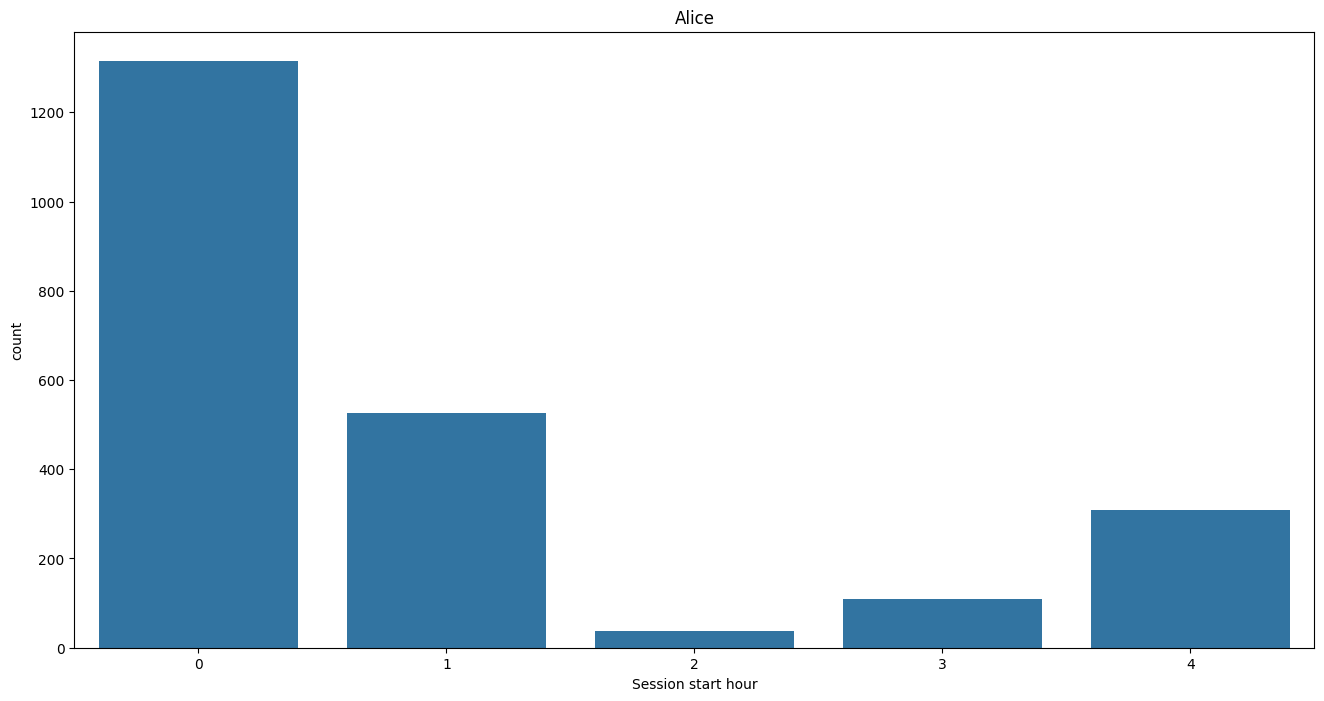

In [6]:
# Plot session start hour for Alice
dow = train_times['time1'].apply(lambda x: x.weekday())
plt.subplots(1, figsize=(16, 8))
sns.countplot(pd.DataFrame(dow[y_train == 1]), x='time1')
plt.title("Alice")
plt.xlabel('Session start hour')

def add_day_month(times, X_sparse, add_feat=True):
    """
    Add day of the week and month features to the sparse matrix.

    Args:
        times: DataFrame containing time columns.
        X_sparse: Sparse matrix of features.
        add_feat: Whether to add features to the correlation DataFrame.

    Returns:
        tuple: Updated sparse matrix and feature names.
    """
    day_of_week = times['time1'].apply(lambda t: t.weekday())
    day_of_week_df = pd.get_dummies(day_of_week)
    day_of_week_df['5_6'] = day_of_week_df[5] + day_of_week_df[6]
    day_of_week_df['2_3'] = day_of_week_df[2] + day_of_week_df[3]

    for d in (2, 3, 5, 6):
        del day_of_week_df[d]

    day_of_week_df = day_of_week_df.rename({i: 'weekday_' + str(i) for i in day_of_week_df.columns}, axis=1)

    objects_to_hstack = [X_sparse, day_of_week_df]
    feature_names = ['weekday_' + str(i) for i in day_of_week_df.columns]

    if add_feat:
        corr_df.append(day_of_week_df.reset_index(drop=True))

    X = hstack(objects_to_hstack)
    return X, feature_names

# Add day and month features to the training and test data
X_train_final, more_feat_names = add_day_month(train_times, X_train_final)
X_test_final, _ = add_day_month(test_times, X_test_final, add_feat=False)
features_name += more_feat_names

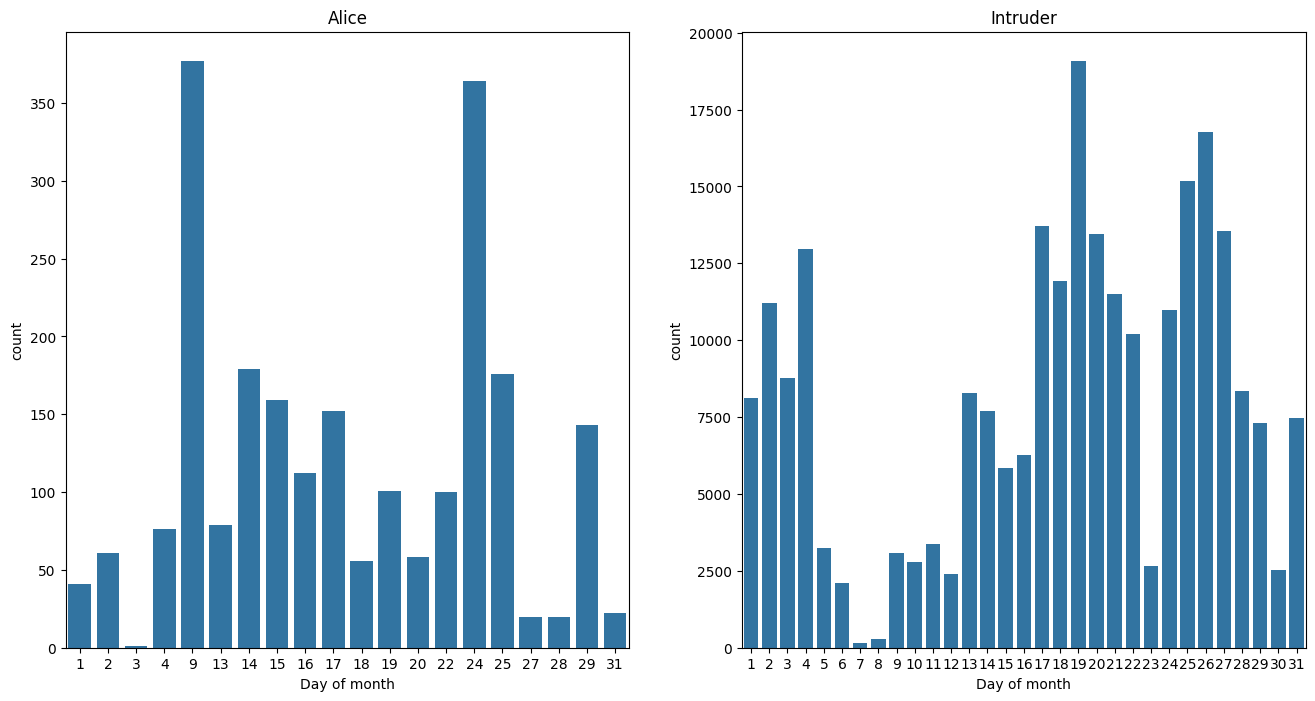

In [7]:
# Plot day of month for Alice and Intruder
dom = train_times['time1'].apply(lambda ts: ts.day)
plt.subplots(1, 2, figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.countplot(pd.DataFrame(dom[(y_train == 1)]), x='time1')
plt.title("Alice")
plt.xlabel('Day of month')

plt.subplot(1, 2, 2)
sns.countplot(pd.DataFrame(dom[(y_train == 0)]), x='time1')
plt.title('Intruder')
plt.xlabel('Day of month')

def add_dom(times, X_sparse, add_feat=True):
    """
    Add day of month features to the sparse matrix.

    Args:
        times: DataFrame containing time columns.
        X_sparse: Sparse matrix of features.
        add_feat: Whether to add features to the correlation DataFrame.

    Returns:
        tuple: Updated sparse matrix and feature names.
    """
    dom = times['time1'].apply(lambda ts: ts.day)
    dom_1 = (dom.isin([3, 5, 6, 7, 8, 10, 11, 12, 21, 23, 27, 28, 30])).values.reshape(-1, 1)
    dom_2 = (dom.isin([9, 24])).values.reshape(-1, 1)
    dom_3 = (dom.isin([17, 18, 19, 20, 21, 22, 24, 25, 26, 31])).values.reshape(-1, 1)

    objects_to_hstack = [X_sparse, dom_1, dom_2, dom_3]
    feature_names = ['dom_1', 'dom_2', 'dom_3']

    if add_feat:
        corr_df.append(pd.DataFrame(dom_1, columns=['dom_1']))
        corr_df.append(pd.DataFrame(dom_2, columns=['dom_2']))
        corr_df.append(pd.DataFrame(dom_3, columns=['dom_3']))

    X = hstack(objects_to_hstack)
    return X, feature_names

# Add day of month features to the training and test data
X_train_final, dom_features = add_dom(train_times, X_train_final)
X_test_final, _ = add_dom(test_times, X_test_final, add_feat=False)
features_name += dom_features

In [8]:
# Train and predict using the final model
final_model = LogisticRegression(C=20, random_state=SEED, solver='liblinear')
proba, ideal, predicted, conf_matrix, cv_scores = train_and_predict(model=final_model, X_train=X_train_final, y_train=y_train,
                                                                     X_test=X_test_final,
                                                                     site_feature_names=vectorizer.get_feature_names_out(),
                                                                     new_feature_names=features_name,
                                                                     cv=time_split, submission_file_name='submission.csv')

CV scores [0.83258131 0.97537971 0.97877715 0.87663354 0.96038059 0.93757734
 0.89727008 0.96506534 0.9889404  0.98365495]
CV mean: 0.9396260424233696, CV std: 0.050482025231184294


Weight?,Feature
+18.686,cid-ed6c3e6a5c6608a4.users.storage.live.com
+11.397,video.tt
+11.327,www.banque-chalus.fr
+10.212,t.voyages-sncf.com
+10.200,static.weezbe.com
+10.180,www.video.tt
+9.891,www.qapa.fr
+9.289,zupimages.net
+9.160,www.kickstarter.com
+9.097,www.tete-en-lair.com


New feature weights:


                feature      coef
0             morning_1 -4.256089
1             morning_2 -1.536779
2                 day_1 -0.707883
3                 day_2 -0.205605
4                 day_3 -1.119248
5                 day_4 -2.793510
6                 day_5 -4.419803
7             evening_1  0.361154
8             evening_2 -0.581111
9             evening_3  0.648522
10                night -8.576917
11    weekday_weekday_0  0.892796
12    weekday_weekday_1  0.668611
13    weekday_weekday_4  0.003435
14  weekday_weekday_5_6 -5.687281
15  weekday_weekday_2_3 -1.789601
16                dom_1 -3.211454
17                dom_2  1.051218
18                dom_3 -0.981124
